<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/stock_market_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Visualization

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Plotly
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode


# style
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving stocks_data_2020_till_2020_09_03.csv to stocks_data_2020_till_2020_09_03.csv


In [4]:
# Loading Stocks data
stocks = pd.read_csv("stocks_data_2020_till_2020_09_03.csv")
stocks.head()

,id,timestamp,open_price,high_price,low_price,close_price,volume,scrip_id
0,1,2020-02-24 09:15:00+05:30,1170.00,1170.00,1149.25,1164.60,104528,2
1,13008,2020-02-24 09:15:00+05:30,318.00,318.00,311.65,312.30,22036,1
2,26015,2020-02-24 09:15:00+05:30,828.95,828.95,825.45,825.85,22222,3
3,39022,2020-02-24 09:15:00+05:30,1672.00,1672.00,1665.00,1667.10,15844,4
4,52029,2020-02-24 09:15:00+05:30,1469.75,1469.75,1463.10,1465.05,150673,5


In [5]:
stocks.shape

(2321232, 8)

In [6]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321232 entries, 0 to 2321231
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   timestamp    object 
 2   open_price   float64
 3   high_price   float64
 4   low_price    float64
 5   close_price  float64
 6   volume       int64  
 7   scrip_id     int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 141.7+ MB


In [7]:
stocks['month'] = pd.DatetimeIndex(stocks.timestamp).month
stocks.head()

,id,timestamp,open_price,high_price,low_price,close_price,volume,scrip_id,month
0,1,2020-02-24 09:15:00+05:30,1170.00,1170.00,1149.25,1164.60,104528,2,2
1,13008,2020-02-24 09:15:00+05:30,318.00,318.00,311.65,312.30,22036,1,2
2,26015,2020-02-24 09:15:00+05:30,828.95,828.95,825.45,825.85,22222,3,2
3,39022,2020-02-24 09:15:00+05:30,1672.00,1672.00,1665.00,1667.10,15844,4,2
4,52029,2020-02-24 09:15:00+05:30,1469.75,1469.75,1463.10,1465.05,150673,5,2


In [9]:
def call_this_stock(df, scrip_id, month, coloumn_name='close_price'): 
    
    temp_df = stocks[(stocks.month == month) & (stocks.scrip_id == scrip_id)]
    particular_stock = temp_df[[coloumn_name, 'timestamp']]
    particular_stock = particular_stock.reset_index(drop=True, inplace=False)
    return particular_stock

stock_value = call_this_stock(stocks, 5, 5)
stock_value.head(15)

,close_price,timestamp
0,1436.70,2020-05-04 09:15:00+05:30
1,1452.55,2020-05-04 09:16:00+05:30
2,1456.70,2020-05-04 09:17:00+05:30
3,1436.50,2020-05-04 09:18:00+05:30
4,1437.00,2020-05-04 09:19:00+05:30
5,1440.70,2020-05-04 09:20:00+05:30
6,1446.15,2020-05-04 09:21:00+05:30
7,1446.70,2020-05-04 09:22:00+05:30
8,1445.30,2020-05-04 09:23:00+05:30
9,1446.40,2020-05-04 09:24:00+05:30


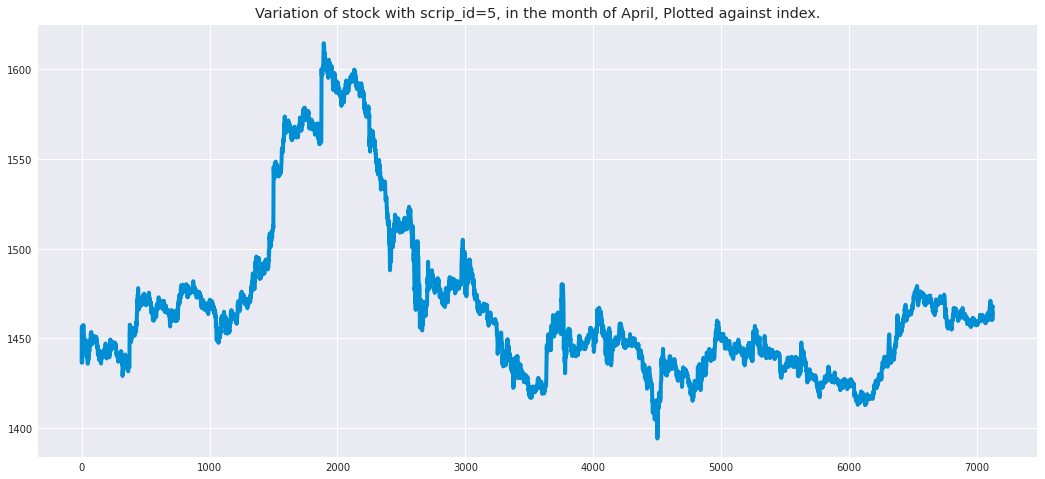

In [10]:
plt.figure(figsize=(16,8))
plt.title('Variation of stock with scrip_id=5, in the month of April, Plotted against index.')
plt.plot(stock_value.close_price);

In [17]:
def timestamp_as_index(df):
    temp = df
    temp.set_index('timestamp', inplace=True)
    return temp

timestamp_as_index(stock_value)

KeyError: ignored

In [15]:
usv = timestamp_as_index(stock_value)
usv

KeyError: ignored

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Variation of stock with scrip_id=5, in the month of April, Plotted against TIMESTAMP as Index.')
plt.plot(usv);

AttributeError: ignored